In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Random forest is nothing but a bag of decision trees

In [56]:
bag = BaggingClassifier(
        DecisionTreeClassifier(),  # Classifier
        n_estimators=1000,         # Number of instances of the estimator
        max_samples=100,           # Maximum samples to take
        bootstrap=True,            # Bagging mode set
        random_state=55    
)
bag.fit(X_train, y_train)
bag_predictions = bag.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, bag_predictions))

0.92


### Random Forest using RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(
    n_estimators = 1000,
    max_leaf_nodes=16,
    oob_score=True,
    max_depth=5,
    criterion='gini',
    random_state=50
)

In [60]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=16, n_estimators=1000,
                       oob_score=True, random_state=50)

In [61]:
rf_predictions = rf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, rf_predictions))

0.92


In [63]:
rf.oob_score_

0.9013333333333333

In [66]:
import numpy as np
np.sum(bag_predictions == rf_predictions)/len(bag_predictions)

0.968

### Feature Importance

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()

In [68]:
rf_iris = RandomForestClassifier(n_estimators=500, random_state=90)
rf_iris.fit(iris['data'], iris['target'])

RandomForestClassifier(n_estimators=500, random_state=90)

In [69]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
rf_iris.feature_importances_

array([0.09465965, 0.02550421, 0.41111436, 0.46872178])

In [72]:
list(zip(iris["feature_names"], rf_iris.feature_importances_))

[('sepal length (cm)', 0.09465964763772224),
 ('sepal width (cm)', 0.025504213597801688),
 ('petal length (cm)', 0.4111143596499693),
 ('petal width (cm)', 0.46872177911450674)]

In [75]:
for feature, score in zip(iris["feature_names"], rf_iris.feature_importances_):
    print(feature, ' ------> ', score*100, '%')

sepal length (cm)  ------>  9.465964763772224 %
sepal width (cm)  ------>  2.550421359780169 %
petal length (cm)  ------>  41.11143596499693 %
petal width (cm)  ------>  46.87217791145068 %


### AdaBoost

In [76]:
from sklearn.datasets import load_iris
iris = load_iris()

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [86]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [87]:
ab = AdaBoostClassifier( n_estimators=50, learning_rate=1)

In [88]:
model = ab.fit(X_train, y_train)
predictions = model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.92


In [90]:
from sklearn.svm import SVC
svc = SVC(probability=True)
ab = AdaBoostClassifier( n_estimators=50, learning_rate=1, base_estimator=svc)

In [91]:
model = ab.fit(X_train, y_train)
predictions = model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.98


### Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [94]:
# Load the dataset
pima = pd.read_csv(r'C:\Users\Purushotham\Desktop\deloitte\machinelearning\datasets\diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
X = pima.drop('Outcome', axis = 1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

In [124]:
gbc = GradientBoostingClassifier(
            n_estimators = 1500,
            learning_rate=0.008,
            random_state=78,
            max_features=8,
            max_depth=5
)
gbc.fit(X_train_transformed, y_train)
predictions = gbc.predict(X_test_transform)

In [125]:
print(confusion_matrix(y_test, predictions))

[[131  37]
 [ 34  52]]


In [126]:
print(accuracy_score(y_test, predictions))

0.7204724409448819


### XGBoost

In [ ]:
%pip install xgboost

In [127]:
import xgboost as xgb

In [128]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [129]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

In [130]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [131]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [132]:
data = pd.DataFrame(boston.data)

In [134]:
data.columns = boston.feature_names

In [135]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [136]:
data['PRICE'] = boston.target

In [137]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [138]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [139]:
xgb_model = xgb.XGBRegressor(
    n_estimators = 100,
    max_depth    = 5,
    learning_rate = 1
)
xgb_model.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)

In [140]:
mean_squared_error(y_test, predictions)

11.928297977115012

In [141]:
np.sqrt(mean_squared_error(y_test, predictions))

3.4537368135274886

In [143]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: PRICE, Length: 167, dtype: float64

In [144]:
predictions

array([22.598682 , 33.292313 , 16.555943 , 23.527325 , 19.38802  ,
       22.919498 , 20.920706 , 16.163965 , 21.262936 , 20.804565 ,
       18.255228 , 18.547754 ,  9.516204 , 21.551603 , 18.958616 ,
       28.278255 , 20.013836 ,  9.1252   , 45.79969  , 15.56578  ,
       26.201157 , 28.640474 , 11.374868 , 22.686731 , 17.439508 ,
       14.665616 , 22.388468 , 13.308808 , 21.475004 , 21.922255 ,
       17.355383 , 24.244648 , 27.208096 , 19.273409 , 15.747137 ,
       19.813288 , 31.291275 , 17.268402 , 23.571037 , 26.8954   ,
       15.796409 , 29.692982 , 46.121418 , 18.327713 , 21.646044 ,
       15.72399  , 13.397987 , 23.988005 , 20.625656 , 25.84197  ,
       21.612173 , 32.269176 , 17.768179 , 31.895723 , 49.066204 ,
       21.962914 , 14.418811 , 34.514126 , 21.713888 , 19.138311 ,
       22.5896   , 37.30657  , 32.102776 , 16.3465   , 23.196297 ,
       21.188519 ,  9.987312 , 26.926987 , 28.716509 , 14.536832 ,
       19.218382 , 33.25865  , 12.972703 , 26.567896 , 22.4705

### k-fold Cross Validation on XGBoost

In [154]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}



In [155]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
cv_results = xgb.cv(
    dtrain=data_dmatrix, 
    params=params, 
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse", 
    as_pandas=True, 
    seed=123
)

[14:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [156]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750758,0.036152,21.765523,0.028849
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118632,18.157336,0.116038
3,16.458958,0.169189,16.623975,0.191413
4,15.074781,0.183545,15.254608,0.213612


### Visualizing XGBoost Trees and Feature Importance

In [157]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


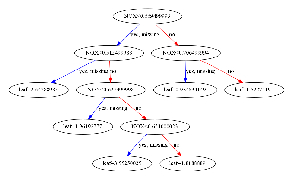

In [160]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

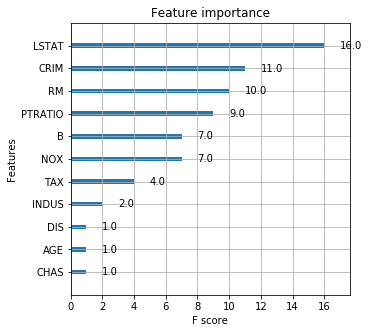

In [162]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 5]
plt.show()

### Hyperparameter Tuning using Scikit-Learn's Grid Search and Randomized Search

In [163]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [164]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [165]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [167]:
gs = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'n_estimators':np.arange(5,100,5),
            'max_features':np.arange(1, 10, 1)
        },
        n_jobs=1,
        cv=5,
        scoring='r2',
        verbose=5
)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV 1/5] END ....max_features=1, n_estimators=5;, score=0.351 total time=   0.0s
[CV 2/5] END ....max_features=1, n_estimators=5;, score=0.159 total time=   0.0s
[CV 3/5] END ....max_features=1, n_estimators=5;, score=0.473 total time=   0.0s
[CV 4/5] END ....max_features=1, n_estimators=5;, score=0.369 total time=   0.0s
[CV 5/5] END ....max_features=1, n_estimators=5;, score=0.140 total time=   0.0s
[CV 1/5] END ...max_features=1, n_estimators=10;, score=0.300 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=10;, score=0.169 total time=   0.0s
[CV 3/5] END ...max_features=1, n_estimators=10;, score=0.511 total time=   0.0s
[CV 4/5] END ...max_features=1, n_estimators=10;, score=0.368 total time=   0.0s
[CV 5/5] END ...max_features=1, n_estimators=10;, score=0.180 total time=   0.0s
[CV 1/5] END ...max_features=1, n_estimators=15;, score=0.363 total time=   0.0s
[CV 2/5] END ...max_features=1, n_estimators=1

[CV 5/5] END ...max_features=2, n_estimators=10;, score=0.311 total time=   0.0s
[CV 1/5] END ...max_features=2, n_estimators=15;, score=0.336 total time=   0.0s
[CV 2/5] END ...max_features=2, n_estimators=15;, score=0.227 total time=   0.0s
[CV 3/5] END ...max_features=2, n_estimators=15;, score=0.436 total time=   0.0s
[CV 4/5] END ...max_features=2, n_estimators=15;, score=0.457 total time=   0.0s
[CV 5/5] END ...max_features=2, n_estimators=15;, score=0.287 total time=   0.0s
[CV 1/5] END ...max_features=2, n_estimators=20;, score=0.411 total time=   0.0s
[CV 2/5] END ...max_features=2, n_estimators=20;, score=0.212 total time=   0.0s
[CV 3/5] END ...max_features=2, n_estimators=20;, score=0.501 total time=   0.0s
[CV 4/5] END ...max_features=2, n_estimators=20;, score=0.494 total time=   0.0s
[CV 5/5] END ...max_features=2, n_estimators=20;, score=0.280 total time=   0.0s
[CV 1/5] END ...max_features=2, n_estimators=25;, score=0.465 total time=   0.0s
[CV 2/5] END ...max_features

[CV 4/5] END ...max_features=3, n_estimators=20;, score=0.510 total time=   0.0s
[CV 5/5] END ...max_features=3, n_estimators=20;, score=0.374 total time=   0.0s
[CV 1/5] END ...max_features=3, n_estimators=25;, score=0.449 total time=   0.0s
[CV 2/5] END ...max_features=3, n_estimators=25;, score=0.171 total time=   0.0s
[CV 3/5] END ...max_features=3, n_estimators=25;, score=0.503 total time=   0.0s
[CV 4/5] END ...max_features=3, n_estimators=25;, score=0.477 total time=   0.0s
[CV 5/5] END ...max_features=3, n_estimators=25;, score=0.297 total time=   0.0s
[CV 1/5] END ...max_features=3, n_estimators=30;, score=0.458 total time=   0.0s
[CV 2/5] END ...max_features=3, n_estimators=30;, score=0.161 total time=   0.0s
[CV 3/5] END ...max_features=3, n_estimators=30;, score=0.542 total time=   0.0s
[CV 4/5] END ...max_features=3, n_estimators=30;, score=0.564 total time=   0.0s
[CV 5/5] END ...max_features=3, n_estimators=30;, score=0.291 total time=   0.0s
[CV 1/5] END ...max_features

[CV 1/5] END ...max_features=4, n_estimators=30;, score=0.435 total time=   0.0s
[CV 2/5] END ...max_features=4, n_estimators=30;, score=0.184 total time=   0.0s
[CV 3/5] END ...max_features=4, n_estimators=30;, score=0.466 total time=   0.0s
[CV 4/5] END ...max_features=4, n_estimators=30;, score=0.538 total time=   0.0s
[CV 5/5] END ...max_features=4, n_estimators=30;, score=0.375 total time=   0.0s
[CV 1/5] END ...max_features=4, n_estimators=35;, score=0.487 total time=   0.0s
[CV 2/5] END ...max_features=4, n_estimators=35;, score=0.221 total time=   0.0s
[CV 3/5] END ...max_features=4, n_estimators=35;, score=0.483 total time=   0.0s
[CV 4/5] END ...max_features=4, n_estimators=35;, score=0.532 total time=   0.0s
[CV 5/5] END ...max_features=4, n_estimators=35;, score=0.319 total time=   0.0s
[CV 1/5] END ...max_features=4, n_estimators=40;, score=0.467 total time=   0.0s
[CV 2/5] END ...max_features=4, n_estimators=40;, score=0.185 total time=   0.0s
[CV 3/5] END ...max_features

[CV 3/5] END ...max_features=5, n_estimators=35;, score=0.477 total time=   0.0s
[CV 4/5] END ...max_features=5, n_estimators=35;, score=0.518 total time=   0.0s
[CV 5/5] END ...max_features=5, n_estimators=35;, score=0.299 total time=   0.0s
[CV 1/5] END ...max_features=5, n_estimators=40;, score=0.503 total time=   0.0s
[CV 2/5] END ...max_features=5, n_estimators=40;, score=0.110 total time=   0.0s
[CV 3/5] END ...max_features=5, n_estimators=40;, score=0.514 total time=   0.0s
[CV 4/5] END ...max_features=5, n_estimators=40;, score=0.552 total time=   0.0s
[CV 5/5] END ...max_features=5, n_estimators=40;, score=0.300 total time=   0.0s
[CV 1/5] END ...max_features=5, n_estimators=45;, score=0.481 total time=   0.0s
[CV 2/5] END ...max_features=5, n_estimators=45;, score=0.156 total time=   0.0s
[CV 3/5] END ...max_features=5, n_estimators=45;, score=0.497 total time=   0.0s
[CV 4/5] END ...max_features=5, n_estimators=45;, score=0.537 total time=   0.0s
[CV 5/5] END ...max_features

[CV 5/5] END ...max_features=6, n_estimators=40;, score=0.303 total time=   0.1s
[CV 1/5] END ...max_features=6, n_estimators=45;, score=0.474 total time=   0.0s
[CV 2/5] END ...max_features=6, n_estimators=45;, score=0.165 total time=   0.0s
[CV 3/5] END ...max_features=6, n_estimators=45;, score=0.478 total time=   0.1s
[CV 4/5] END ...max_features=6, n_estimators=45;, score=0.532 total time=   0.0s
[CV 5/5] END ...max_features=6, n_estimators=45;, score=0.307 total time=   0.0s
[CV 1/5] END ...max_features=6, n_estimators=50;, score=0.438 total time=   0.1s
[CV 2/5] END ...max_features=6, n_estimators=50;, score=0.138 total time=   0.1s
[CV 3/5] END ...max_features=6, n_estimators=50;, score=0.501 total time=   0.1s
[CV 4/5] END ...max_features=6, n_estimators=50;, score=0.543 total time=   0.1s
[CV 5/5] END ...max_features=6, n_estimators=50;, score=0.313 total time=   0.0s
[CV 1/5] END ...max_features=6, n_estimators=55;, score=0.463 total time=   0.1s
[CV 2/5] END ...max_features

[CV 2/5] END ...max_features=7, n_estimators=50;, score=0.109 total time=   0.1s
[CV 3/5] END ...max_features=7, n_estimators=50;, score=0.483 total time=   0.0s
[CV 4/5] END ...max_features=7, n_estimators=50;, score=0.545 total time=   0.0s
[CV 5/5] END ...max_features=7, n_estimators=50;, score=0.332 total time=   0.1s
[CV 1/5] END ...max_features=7, n_estimators=55;, score=0.441 total time=   0.1s
[CV 2/5] END ...max_features=7, n_estimators=55;, score=0.158 total time=   0.1s
[CV 3/5] END ...max_features=7, n_estimators=55;, score=0.453 total time=   0.1s
[CV 4/5] END ...max_features=7, n_estimators=55;, score=0.528 total time=   0.1s
[CV 5/5] END ...max_features=7, n_estimators=55;, score=0.347 total time=   0.1s
[CV 1/5] END ...max_features=7, n_estimators=60;, score=0.434 total time=   0.1s
[CV 2/5] END ...max_features=7, n_estimators=60;, score=0.157 total time=   0.0s
[CV 3/5] END ...max_features=7, n_estimators=60;, score=0.457 total time=   0.1s
[CV 4/5] END ...max_features

[CV 4/5] END ...max_features=8, n_estimators=55;, score=0.551 total time=   0.1s
[CV 5/5] END ...max_features=8, n_estimators=55;, score=0.373 total time=   0.0s
[CV 1/5] END ...max_features=8, n_estimators=60;, score=0.443 total time=   0.1s
[CV 2/5] END ...max_features=8, n_estimators=60;, score=0.141 total time=   0.1s
[CV 3/5] END ...max_features=8, n_estimators=60;, score=0.458 total time=   0.1s
[CV 4/5] END ...max_features=8, n_estimators=60;, score=0.540 total time=   0.0s
[CV 5/5] END ...max_features=8, n_estimators=60;, score=0.365 total time=   0.1s
[CV 1/5] END ...max_features=8, n_estimators=65;, score=0.453 total time=   0.1s
[CV 2/5] END ...max_features=8, n_estimators=65;, score=0.128 total time=   0.1s
[CV 3/5] END ...max_features=8, n_estimators=65;, score=0.481 total time=   0.1s
[CV 4/5] END ...max_features=8, n_estimators=65;, score=0.563 total time=   0.1s
[CV 5/5] END ...max_features=8, n_estimators=65;, score=0.341 total time=   0.2s
[CV 1/5] END ...max_features

[CV 1/5] END ...max_features=9, n_estimators=65;, score=0.492 total time=   0.1s
[CV 2/5] END ...max_features=9, n_estimators=65;, score=0.113 total time=   0.1s
[CV 3/5] END ...max_features=9, n_estimators=65;, score=0.476 total time=   0.1s
[CV 4/5] END ...max_features=9, n_estimators=65;, score=0.539 total time=   0.1s
[CV 5/5] END ...max_features=9, n_estimators=65;, score=0.362 total time=   0.1s
[CV 1/5] END ...max_features=9, n_estimators=70;, score=0.483 total time=   0.1s
[CV 2/5] END ...max_features=9, n_estimators=70;, score=0.131 total time=   0.1s
[CV 3/5] END ...max_features=9, n_estimators=70;, score=0.489 total time=   0.1s
[CV 4/5] END ...max_features=9, n_estimators=70;, score=0.561 total time=   0.2s
[CV 5/5] END ...max_features=9, n_estimators=70;, score=0.366 total time=   0.2s
[CV 1/5] END ...max_features=9, n_estimators=75;, score=0.478 total time=   0.2s
[CV 2/5] END ...max_features=9, n_estimators=75;, score=0.151 total time=   0.2s
[CV 3/5] END ...max_features

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=5)

In [168]:
gs.best_params_

{'max_features': 3, 'n_estimators': 20}

In [169]:
rs = RandomizedSearchCV(
        estimator=RandomForestRegressor(),
        param_distributions={
            'n_estimators':np.arange(5,100,5),
            'max_features':np.arange(1, 10, 1)
        },
        n_jobs=1,
        cv=5,
        scoring='r2',
        verbose=5
)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...max_features=9, n_estimators=45;, score=0.485 total time=   0.1s
[CV 2/5] END ...max_features=9, n_estimators=45;, score=0.140 total time=   0.1s
[CV 3/5] END ...max_features=9, n_estimators=45;, score=0.444 total time=   0.1s
[CV 4/5] END ...max_features=9, n_estimators=45;, score=0.511 total time=   0.1s
[CV 5/5] END ...max_features=9, n_estimators=45;, score=0.382 total time=   0.0s
[CV 1/5] END ...max_features=2, n_estimators=80;, score=0.425 total time=   0.0s
[CV 2/5] END ...max_features=2, n_estimators=80;, score=0.244 total time=   0.1s
[CV 3/5] END ...max_features=2, n_estimators=80;, score=0.491 total time=   0.1s
[CV 4/5] END ...max_features=2, n_estimators=80;, score=0.515 total time=   0.1s
[CV 5/5] END ...max_features=2, n_estimators=80;, score=0.301 total time=   0.1s
[CV 1/5] END ...max_features=2, n_estimators=35;, score=0.450 total time=   0.0s
[CV 2/5] END ...max_features=2, n_estimators=35;

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   scoring='r2', verbose=5)

In [170]:
rs.best_params_

{'n_estimators': 70, 'max_features': 9}

### Learning Curve

In [171]:
import pandas as pd
electricity = pd.read_csv(r'C:\Users\Purushotham\Desktop\deloitte\machinelearning\datasets\electricity.csv')
print(electricity.info())
electricity.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [172]:
electricity.shape

(9568, 5)

In [173]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
train_sizes, train_scores, validation_scores = learning_curve(
                                                                estimator = LinearRegression(),
                                                                X = electricity[features],
                                                                y = electricity[target], train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error'
)

In [175]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [177]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0, 40)

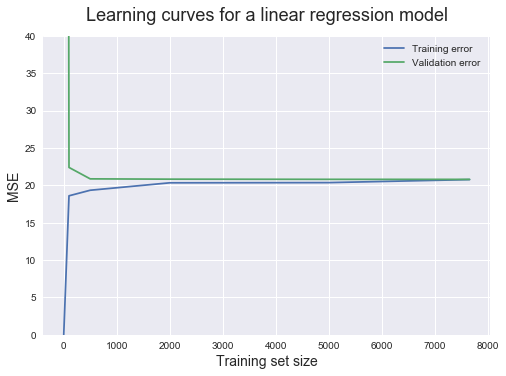

In [178]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [179]:
### Bundling our previous work into a function ###
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)

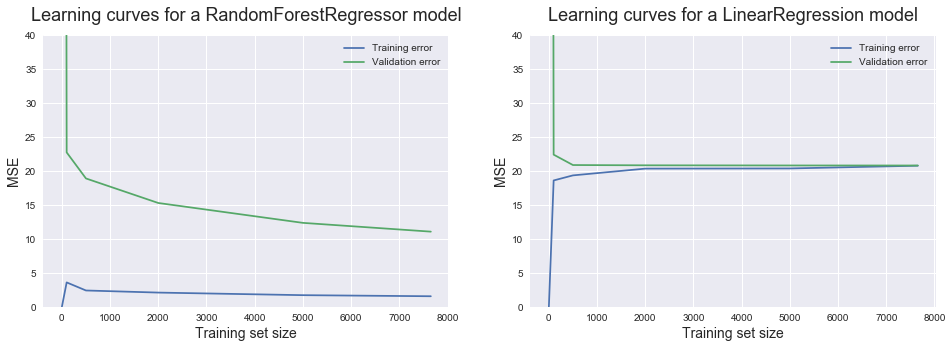

In [180]:
from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (16,5))

for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, electricity, features, target, train_sizes, 5)